<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>Projeto de Otimização e Simulação</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA
<br></br>

**Professor:** Jefferson de Oliveira Silva

**Aluno:** Lucas Lopes Amorim
<br></br>



A execução desse caderno depende de dois arquivos, <i>cidades_sp.tsv</i> e <i>geojs-35-mun.tsv</i> que foram enviados em anexo

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
import networkx as nx
import folium
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Gerando Matriz de Distâncias

In [7]:
df = pd.read_csv('cidades_sp.tsv', sep='\t')
df.head()

,origem,destino,distancia
0,Adamantina,Adamantina,0.000000
1,Adamantina,Adolfo,148.940883
2,Adamantina,Aguaí,418.569402
3,Adamantina,Águas da Prata,453.052818
4,Adamantina,Águas de Lindóia,470.358245


In [8]:
cidades_sp = list(df.origem.unique())

In [9]:
# Caso quisermos testar a solução de uma amostra aleatória de cidades
# np.random.seed(1)
# sample = np.random.choice(cidades_sp, size=20)
# sample

In [10]:
# Definindo 20 cidades que vão fazer parte da rota
sample = np.array(['Sarapuí', 'Sarutaiá', 'Sebastianópolis do Sul', 'Serra Azul',
'Serra Negra', 'Serrana', 'Sertãozinho', 'Sete Barras', 'Severínia',
'Silveiras', 'Sorocaba', 'Sud Mennucci', 'São Paulo', 'São Pedro',
'São Pedro do Turvo', 'São Roque', 'São Sebastião',
'São Sebastião da Grama', 'São Simão', 'São Vicente'])
sample

array(['Sarapuí', 'Sarutaiá', 'Sebastianópolis do Sul', 'Serra Azul',
       'Serra Negra', 'Serrana', 'Sertãozinho', 'Sete Barras',
       'Severínia', 'Silveiras', 'Sorocaba', 'Sud Mennucci', 'São Paulo',
       'São Pedro', 'São Pedro do Turvo', 'São Roque', 'São Sebastião',
       'São Sebastião da Grama', 'São Simão', 'São Vicente'], dtype='<U22')

In [11]:
distance_df = df[(df.destino.isin(sample)) & (df.origem.isin(sample))].pivot_table(index='destino', columns='origem', values='distancia')
distance_df

origem,Sarapuí,Sarutaiá,Sebastianópolis do Sul,Serra Azul,Serra Negra,Serrana,Sertãozinho,Sete Barras,Severínia,Silveiras,Sorocaba,Sud Mennucci,São Paulo,São Pedro,São Pedro do Turvo,São Roque,São Sebastião,São Sebastião da Grama,São Simão,São Vicente
destino,,,,,,,,,,,,,,,,,,,,
Sarapuí,0.000000,179.002003,401.306976,261.136492,163.840214,271.584525,282.352394,69.227776,334.459991,318.559758,41.080660,461.904934,116.042648,123.314398,230.782867,70.134516,222.409369,236.674722,244.960391,136.122974
Sarutaiá,179.002003,0.000000,294.314894,293.001641,296.077162,297.014967,280.975986,193.642008,282.019317,479.280679,209.296496,322.196338,292.717665,177.504391,70.701124,244.541068,399.492725,326.407306,280.009286,315.124857
Sebastianópolis do Sul,401.306976,294.314894,0.000000,257.396272,398.391037,248.219441,205.679359,451.931337,118.217832,574.418642,404.152839,102.784875,474.679605,296.658440,227.244917,433.817230,562.801901,351.054395,260.673281,510.279876
Serra Azul,261.136492,293.001641,257.396272,0.000000,166.759478,12.735215,52.259666,329.919888,141.630982,320.753165,238.106838,355.746743,274.625063,142.870940,274.609105,251.386173,335.707000,95.688255,16.182034,312.270383
Serra Negra,163.840214,296.077162,398.391037,166.759478,0.000000,179.489016,212.207471,226.044701,295.053934,190.414981,124.345171,485.370457,117.612891,127.358715,317.270478,114.831955,169.760022,92.758465,154.508597,153.017334
Serrana,271.584525,297.014967,248.219441,12.735215,179.489016,0.000000,42.543220,340.151662,131.500645,331.864029,249.438841,347.450025,287.144441,151.987740,275.649727,263.383422,348.379527,106.998204,27.431435,324.814615
Sertãozinho,282.352394,280.975986,205.679359,52.259666,212.207471,42.543220,0.000000,349.027167,89.371761,372.789155,265.672962,305.062774,313.001338,159.164676,250.724773,284.196192,381.967352,147.733593,59.128044,350.791776
Sete Barras,69.227776,193.642008,451.931337,329.919888,226.044701,340.151662,349.027167,0.000000,395.423787,359.104625,102.554356,502.640268,148.082036,190.021681,257.676146,116.216986,243.853524,304.273575,313.737856,151.159721
Severínia,334.459991,282.019317,118.217832,141.630982,295.053934,131.500645,89.371761,395.423787,0.000000,461.862229,326.781953,219.930944,386.010199,215.113612,232.038448,351.111401,463.869824,236.935698,147.209174,423.296754


## Resolvendo o problema do caixeiro viajante com o OR-Tools

In [12]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [13]:
# Transformando Matriz de Distâncias em array
D = distance_df.values.astype(int)

In [14]:
manager = pywrapcp.RoutingIndexManager(
    len(D),  # Número de linhas da matriz de distâncias
    1,  # Número de veículos do problema
    list(distance_df.index).index('São Paulo')  # O nó inicial e final da rota
    )

routing = pywrapcp.RoutingModel(manager)

In [15]:
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return D[from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

In [16]:
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

In [17]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

## Obtendo resultados

In [18]:
def print_solution(manager, routing, solution):
    """Printa a solução no console."""
    print(f'Menor distância para rota: {solution.ObjectiveValue()} km.')
    index = routing.Start(0)
    plan_output = 'Rota:\n'
    route_distance = 0
    visited_cities = 0
    while not routing.IsEnd(index):
        if visited_cities % 6 == 0 and route_distance > 0:
          plan_output += f' {sample[index]} ->\n'
        else:
          plan_output += f' {sample[index]} ->'
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
        visited_cities += 1
    plan_output += f' {sample[manager.IndexToNode(index)]}\n'
    print(plan_output)
    plan_output += 'Distância da rota: {}km\n'.format(route_distance)

In [19]:
solution = routing.SolveWithParameters(search_parameters)
if solution:
    print_solution(manager, routing, solution)

Menor distância para rota: 1892 km.
Rota:
 São Paulo -> São Vicente -> São Sebastião -> Silveiras -> Serra Negra -> São Sebastião da Grama -> São Simão ->
 Serra Azul -> Serrana -> Sertãozinho -> Severínia -> Sebastianópolis do Sul -> Sud Mennucci ->
 São Pedro do Turvo -> Sarutaiá -> São Pedro -> Sarapuí -> Sete Barras -> Sorocaba ->
 São Roque -> São Paulo



## Criando visualização

In [20]:
def get_routes(solution, routing, manager):
  """Obtém as rotas da solução e armazena-as em uma matriz"""
  # Obtém as rotas da solução e armazena-as em uma array bidimensional.
  # A ordem dos valores corresponde a ordem da rota otimizada
  for route_nbr in range(routing.vehicles()):
    index = routing.Start(route_nbr)
    route = [manager.IndexToNode(index)]
    while not routing.IsEnd(index):
      index = solution.Value(routing.NextVar(index))
      route.append(manager.IndexToNode(index))
  return route

In [21]:
# Encontra os indexes de cada nó na ordem otimizada de viagem
routes = get_routes(solution, routing, manager)
routes

[12, 19, 16, 9, 4, 17, 18, 3, 5, 6, 8, 2, 11, 14, 1, 13, 0, 7, 10, 15, 12]

In [22]:
# Obtendo a localização das cidades
gdf = gpd.read_file('/content/geojs-35-mun.json')
gdf['centroid'] = gdf['geometry'].centroid
gdf.head()

,id,name,description,geometry,centroid
0,3500105,Adamantina,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...",POINT (-51.05616 -21.57630)
1,3500204,Adolfo,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...",POINT (-49.65281 -21.28808)
2,3500303,Aguaí,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...",POINT (-47.03971 -22.04960)
3,3500402,Águas da Prata,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...",POINT (-46.69131 -21.91376)
4,3500501,Águas de Lindóia,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...",POINT (-46.60305 -22.47405)


In [32]:
G = nx.DiGraph()

In [34]:
for i in routes:
  G.add_node(i, name=sample[i])

In [25]:
edges_list = [tuple(routes[i:i+2]) for i in range(len(routes)-1)]
for from_node, to_node in edges_list:
  G.add_edge(from_node, to_node,
             distance=D[from_node, to_node],
             name=f'{from_node} -> {to_node}'
             )

In [26]:
ref_df = gdf.set_index('name')
pos_ = dict()
for i in routes:
  node_name = sample[i]
  temp_pos = ref_df.loc[node_name, 'centroid']
  pos_[i] = (temp_pos.y, temp_pos.x)

In [27]:
node_labels = {index: name for index, name in enumerate(sample)}
temp_edge_labels = [round(D[from_node, to_node]) for from_node, to_node in edges_list]
edge_labels = {e: label for e,label in zip(G.edges(), temp_edge_labels)}

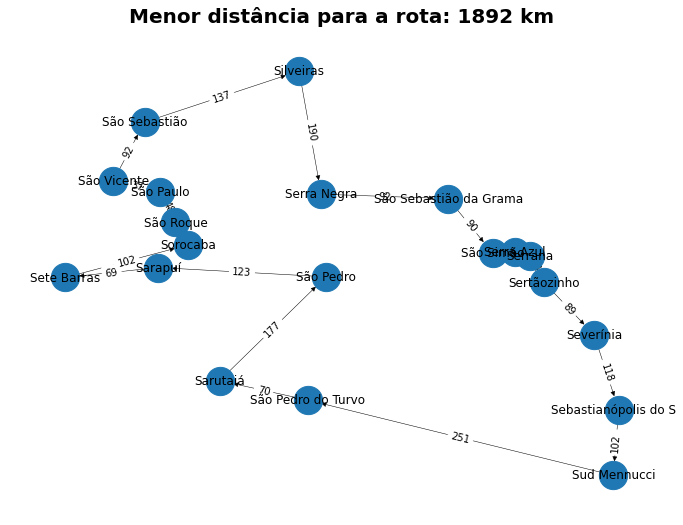

In [28]:
plt.figure(figsize=(12,9))
plt.title(f'Menor distância para a rota: {solution.ObjectiveValue()} km', weight='bold', fontsize=20)
# Constrói um grafo com todos os nós
nx.draw(G,pos_,with_labels=True, node_size=800, width=0.5, labels=node_labels)
# Adiciona rótulos aos vértices
nx.draw_networkx_edge_labels(G,pos_,edge_labels=edge_labels)
plt.show()

In [31]:
# Criando Mapa
m = folium.Map(location=(-22.069639, -48.434335), zoom_start=7)

# Criando lista com lat e lon de cada um dos nós
locs = list(pos_.values())
locs += [locs[0]]

# Adicionando Marcadores ao mapa
for node, coords in pos_.items():
    folium.Marker(
        location=coords, 
        popup=f'<div style="width=100px"><b>{node_labels[node]}</b><br>Visita N° {routes.index(node)+1}<div>',
        tooltip=node_labels[node],
        icon=folium.Icon(
            color="red" if node_labels[node] == 'São Paulo' else 'blue',
            icon='location-dot')
    ).add_to(m)

# Adicionando linhas de deslocamento no mapa
for i in range(len(locs)-1):
    folium.PolyLine((locs[i], locs[i+1]),
                    color='red',
                    weight=5,
                    opacity=0.8).add_to(m)

m